<div style = "text-align: left"><font size = 8 color = "#B22222" face = "verdana"><b>Data Hackerman Purple Zone</b></font></div>
<div style = "text-align: left"><font size = 6 color = "#00008B" face = "verdana"><b>file manipulation</b></font></div>
<div style = "text-align: leftt"><font><i>By Jerry Aremu</i></font></div>
<div style = "text-align: leftt"><font>26 April 2023</font></div>



#### import libraries

In [108]:
import pandas as pd
import numpy as np
import warnings
import requests
import os
import json
import folium
from folium.plugins import HeatMap
import seaborn as sns
import matplotlib.pyplot as plt

#### import notebook custom settings

In [7]:
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### FILE MANIPULATION

#### Load the three data files

In [8]:
# main working folder
main_folder = os.getcwd()

In [9]:
# main data folder
data_folder = 'data'

In [10]:
# combine the paths
main_path = os.path.join(main_folder, data_folder)

In [11]:
# get list of files in the folder
files_list = os.listdir(main_path)
files_list

['csv_file.csv', 'json_file.json', 'txt_file.txt']

#### Read each file as a dataframe

### CSV

In [64]:
csv_format_data = pd.read_csv(os.path.join(main_path, files_list[0]))
print(f"The shape of the dataframe is: {csv_format_data.shape}")
csv_format_data.head(2)

The shape of the dataframe is: (1000, 9)


,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566,False,Can't believe I'm missing Love Island 😩,GB,twitter,1,51.57,0.46
1,114,1377,False,Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable,GB,twitter,1,52.97,-1.17


### json

In [59]:
with open(os.path.join(main_path, files_list[1])) as f:
    Json_data = f.read()
json_pyobj = json.loads(Json_data)    

In [62]:
json_format_df = pd.json_normalize(json_pyobj)

In [66]:
print(f"The shape of the json format data is: {json_format_df.shape}")
json_format_df.head(3)

The shape of the json format data is: (1000, 9)


,author.properties.friends,author.properties.verified,author.properties.status_count,location.longitude,location.country,location.latitude,content.body,properties.sentiment,properties.platform
0,150,False,583,-1.45,GB,53.38,To everyone tryin to snapchat me fuck off I'm ugly,-1,twitter
1,1321,False,86271,-4.20,GB,57.79,@cammiescott have you ever been to Scotland? You should give Nessie a wee visit! (I live near her) #askcamscott,-1,twitter
2,1952,False,11785,-0.07,GB,51.46,#LoveIsland #zaraholland 😭😭😭😭 https://t.co/LUpQvshkm3,-1,twitter


### Txt

In [67]:
txt_format_data = pd.read_csv(os.path.join(main_path, files_list[2]), sep = ',', header = 0)
print(f"The shape of the dataframe is: {txt_format_data.shape}")
txt_format_data.head(2)

The shape of the dataframe is: (1000, 9)


,author.properties.friends,author.properties.verified,location.longitude,author.properties.status_count,properties.sentiment,location.latitude,location.country,content.body,properties.platform
0,632,False,-2.32,106490.00,0.00,52.12,GB,@moel_bryn https://t.co/qvz1bI2Utb,twitter
1,278,False,-0.34,31467.00,-1.00,51.60,GB,Who wants to rap battle with me on stream tomorrow 👀,twitter


### combine the three data as one by concatenation

In [68]:
# first collate the CSV and TXT file together 
merged_csv_txt_df = pd.concat([csv_format_data,txt_format_data]).reset_index(drop = True)
print(f"The shape of the csv+txt file is : {merged_csv_txt_df.shape}")
merged_csv_txt_df.head(3)

The shape of the csv+txt file is : (2000, 9)


,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46
1,114,1377.00,False,Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable,GB,twitter,1.00,52.97,-1.17
2,568,8375.00,False,"How many times does he wonna say the phrase ""i deal with shit"" #LoveIsland",GB,twitter,-1.00,51.39,0.03


In [69]:
# now further merge the csv+txt merged data to the json data
combined_data_df = pd.concat([merged_csv_txt_df,json_format_df]).reset_index(drop = True)
print(f"The shape of the csv+txt file is : {combined_data_df.shape}")
combined_data_df.head(3)

The shape of the csv+txt file is : (3000, 9)


,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46
1,114,1377.00,False,Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable,GB,twitter,1.00,52.97,-1.17
2,568,8375.00,False,"How many times does he wonna say the phrase ""i deal with shit"" #LoveIsland",GB,twitter,-1.00,51.39,0.03


### DATA EXPLORATION

#### Inspect the combined data

In [70]:
combined_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   author.properties.friends       3000 non-null   object 
 1   author.properties.status_count  2999 non-null   float64
 2   author.properties.verified      3000 non-null   object 
 3   content.body                    2999 non-null   object 
 4   location.country                2999 non-null   object 
 5   properties.platform             2998 non-null   object 
 6   properties.sentiment            2999 non-null   float64
 7   location.latitude               2999 non-null   float64
 8   location.longitude              2999 non-null   float64
dtypes: float64(4), object(5)
memory usage: 211.1+ KB


In [71]:
# get the summary statistics of the data
combined_data_df.describe()

,author.properties.status_count,properties.sentiment,location.latitude,location.longitude
count,2999.00,2999.00,2999.00,2999.00
mean,35139.96,-0.26,52.75,-1.61
std,129182.54,0.78,1.66,1.64
min,2.00,-1.00,49.19,-7.82
25%,3427.50,-1.00,51.50,-2.68
50%,11435.00,0.00,52.20,-1.40
75%,30461.00,0.00,53.69,-0.18
max,1702464.00,1.00,58.17,1.40


#### Examine the loaction that the data is coming from 

In [90]:
combined_data_wtout_na = combined_data_df.dropna(subset = ['location.latitude'])

In [93]:
# get the location where sentiments on properties were sampled 
location_data = combined_data_wtout_na[['location.latitude','location.longitude']]
area_map =  folium.Map(location=[58.17,1.40], zoom_start=10)
heat_map_data = [[row['location.latitude'],row['location.longitude']] for index, row in location_data.iterrows()]

In [131]:
# display map 
HeatMap(heat_map_data, radius=10).add_to(area_map)

#display the map
area_map

#### show the spread of the sentiment based on area 

In [118]:
# get the dataframe of properties with positive sentiment 
positv_sentimnt_df = combined_data_wtout_na[combined_data_wtout_na['properties.sentiment']==-1]
print(f"The shape of the positive sentiment dataframe is; {positv_sentimnt_df.shape}")
positv_sentimnt_df.head(2)

The shape of the positive sentiment dataframe is; (1403, 9)


,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
2,568,8375.00,False,"How many times does he wonna say the phrase ""i deal with shit"" #LoveIsland",GB,twitter,-1.00,51.39,0.03
3,1845,19394.00,False,...even better if time travel were invented and I could go there back in 1876 and have a whiskey with Al #Deadwood,GB,twitter,-1.00,51.65,-3.80


In [120]:
# get the dataframe of properties with negative sentiment 
negatv_sentimnt_df = combined_data_wtout_na[combined_data_wtout_na['properties.sentiment']==-1]
print(f"The shape of the negative sentiment dataframe is; {negatv_sentimnt_df.shape}")
negatv_sentimnt_df.head(2)

The shape of the negative sentiment dataframe is; (1403, 9)


,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
2,568,8375.00,False,"How many times does he wonna say the phrase ""i deal with shit"" #LoveIsland",GB,twitter,-1.00,51.39,0.03
3,1845,19394.00,False,...even better if time travel were invented and I could go there back in 1876 and have a whiskey with Al #Deadwood,GB,twitter,-1.00,51.65,-3.80


In [121]:
# get the dataframe of properties with no remark sentiment 
no_sentimnt_df = combined_data_wtout_na[combined_data_wtout_na['properties.sentiment']==0]
print(f"The shape of the negative sentiment dataframe is; {no_sentimnt_df.shape}")
no_sentimnt_df.head(2)

The shape of the negative sentiment dataframe is; (968, 9)


,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
4,1617,17922.00,False,@GreenAlty @ShakeyStephens My Mum in mid 80s pushed into road by Black migrants 2 sons with disabilities attacked robbed U THINK WE NEED MOR,GB,twitter,0.00,53.54,-2.65
8,783,32215.00,False,"@Ray1Moses @Cornerstone_HQ Rice flour then. Doesn't have the same effect yelling ""Self-raising"" . People just think you're mad .",GB,twitter,0.00,57.59,-4.53


In [123]:
# Create a Folium map centered on the first location of df1
map2 = folium.Map(location=[positv_sentimnt_df['location.latitude'].iloc[0], positv_sentimnt_df['location.longitude'].iloc[0]], zoom_start=5)

In [130]:
# Add markers for each location of positv_sentimnt_df with blue color
positv_sentimnt_df.apply(lambda row: folium.Marker(location=[row['location.latitude'], row['location.longitude']], popup=row['location.country'], icon=folium.Icon(color='blue')).add_to(map2), axis=1)

# Add markers for each location of negatv_sentimnt_df with red color
negatv_sentimnt_df.apply(lambda row: folium.Marker(location=[row['location.latitude'], row['location.longitude']], popup=row['location.country'], icon=folium.Icon(color='red')).add_to(map2), axis=1)

# Add markers for each location of no_sentimnt_df with green color
no_sentimnt_df.apply(lambda row: folium.Marker(location=[row['location.latitude'], row['location.longitude']], popup=row['location.country'], icon=folium.Icon(color='green')).add_to(map2), axis=1)

# Display the map
map2;

map2.save('map.html')

#### Ratio of positive to negative sentiment and no_remarks

In [114]:
sentiment_series = combined_data_wtout_na['properties.sentiment']

In [110]:
sentiment_count = combined_data_wtout_na["properties.sentiment"].unique()
sentiment_count

array([ 1., -1.,  0.])

Text(0.5, 0, 'properties_sentiment')

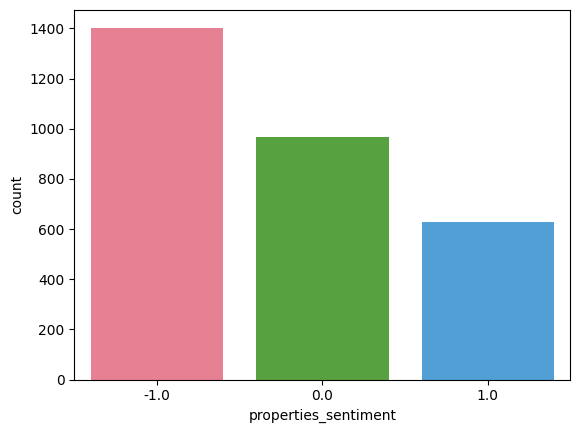

In [116]:
ax = sns.countplot(x = sentiment_series, palette = 'husl')
ax.set_xlabel('properties_sentiment')
